## Predicting Heart disease using machine learning

This notebook looks into using various python based machine learning and data science libraries In an attempt to build a machine learning model capable of predicting whether someone has heart disease based on their medical attributes.

### 1. Problem definition
In a statement,
> Given clinical parameters about a patient, can we predict whether they have heart disease.

### 2. Data
> The original data came from Cleveland data from the UCI machine learning repository.
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

### 3. Evaluation
> If we can reach 95% accuracy at predicting whether a patient has heart disease during the proof of concept, we'll pursue the project.

### 4. Features
> This is where you'll get different information about each of the features in your data.
Create data dictionary
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
    *        > can range from mild symptoms to severe problems
    *        > signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
    *        > Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools

We are going to use Pandas, Matplotlib and Numpy for data analysis and manipulation.

In [1]:
# Import all the tools that we need

# Regular EDA (Exploratory data analysis) plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import title

# Model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape # rows and columns

(303, 14)

### Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject-matter expert on the data set you are working with.

1. What questions are you trying to solve ?
2. What kind of data do we have and how do we treat different types ?
3. Words missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add, change or remove features to get more out of your data ?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Let's find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

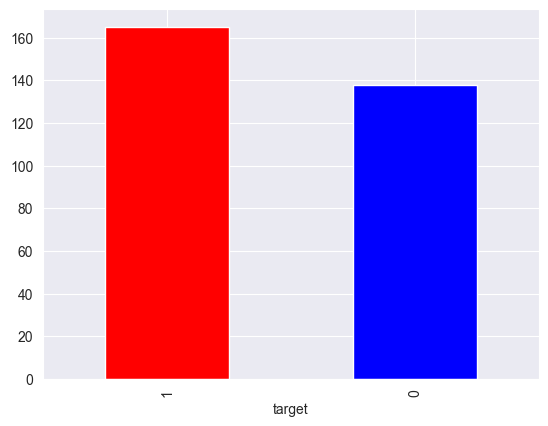

In [8]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"]);

In [9]:
# Are there any missing values ?
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart disease frequency according to sex

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


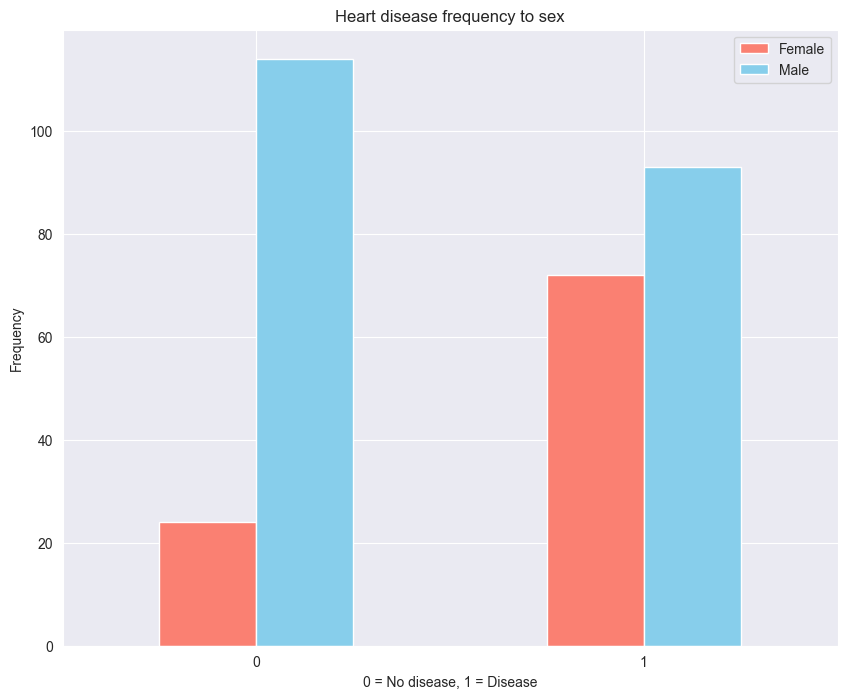

In [13]:
# Create a plot of cross-tab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 8),
                                    color=["salmon", "skyblue"])
plt.title("Heart disease frequency to sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); #Makes the X axis 0 and 1 Vertical

In [14]:
df["thalach"].value_counts() # maximum heart rate achieved

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

#### Age vs Max heart-rate for Heart disease

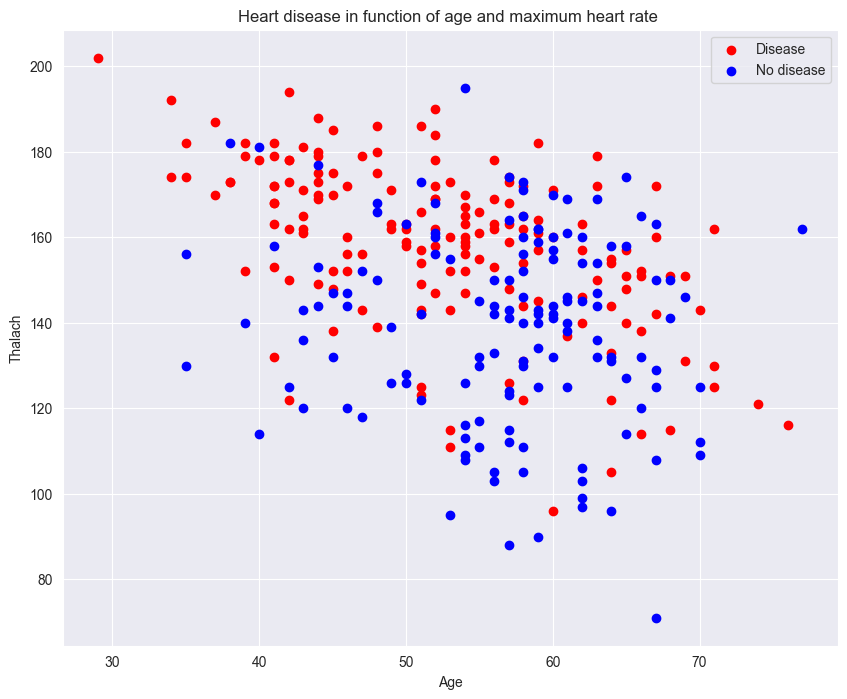

In [15]:
# create another figure
plt.figure(figsize=(10, 8))

#  Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],
            color="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],
            color="blue")

plt.title("Heart disease in function of age and maximum heart rate ")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease", "No disease"]);

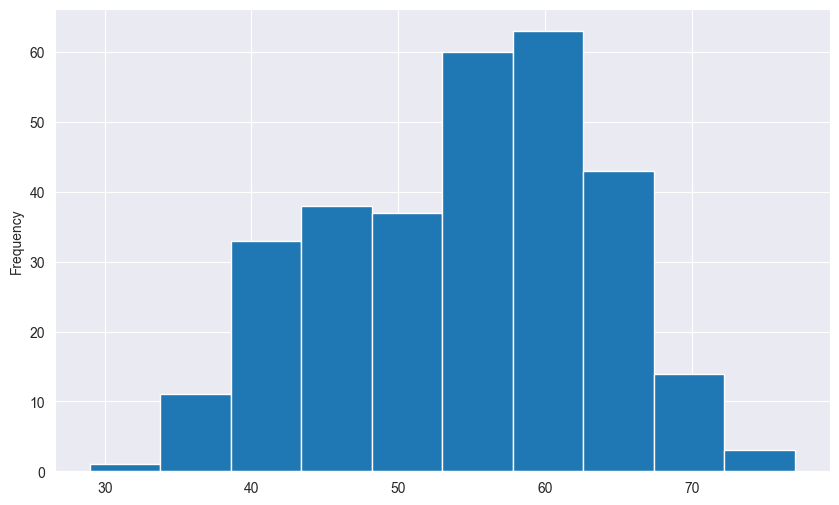

In [16]:
# check the distribution of the age column with histogram
df.age.plot.hist(figsize=(10, 6));

#### Heart disease frequency as per chest pain type

from 3. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


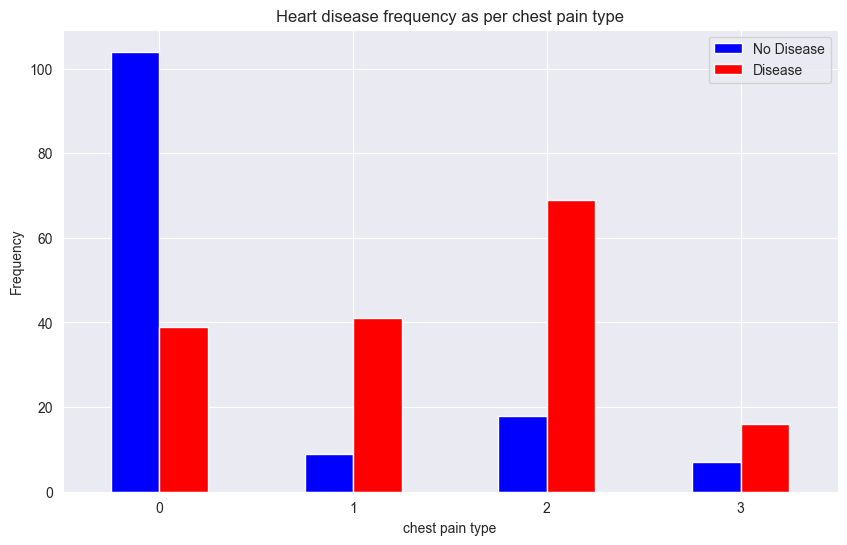

In [18]:
# Make the cross tab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",  color=["blue", "red"], figsize=(10, 6))
plt.title("Heart disease frequency as per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [19]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


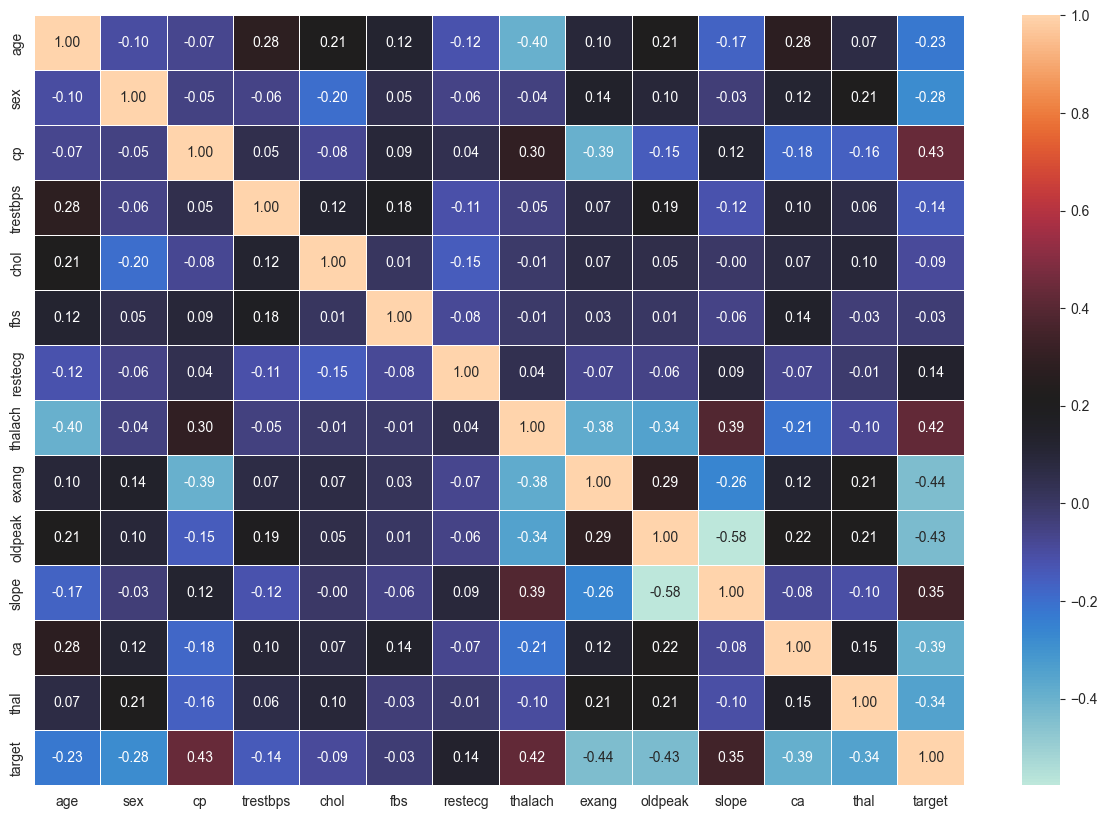

In [20]:
# Let's make our correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=.5,
                 fmt=".2f", # format to 2 decimal places
                 cmap="icefire") # colors

### 5. Modelling

In [21]:
# split data into x and y
x =df.drop("target", axis=1)
y = df["target"]

In [22]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# split the data into train and test split
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we have got our data split into training and test sets, it's time to build a machine learning model.

We will train it (find the patterns) on the training set.

And we will test it (use the patterns) on the test set.

We're going to try 3 different machine learning models :
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [27]:
# put modela in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, x_train, y_train, x_test, y_test):
    """
    Fits and evaluates given machine learning models.
    models: A dictionary of different SciKit-learn machine learning models
    x_train: Training data (no labels)
    x_test: Test data (no labels)
    y_train: Training labels
    y_test: Test labels
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             y_train=y_train,
                             x_test=x_test,
                             y_test=y_test)

model_scores

C:\Users\Asus\Downloads\projects\pomodoro-start\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model comparision

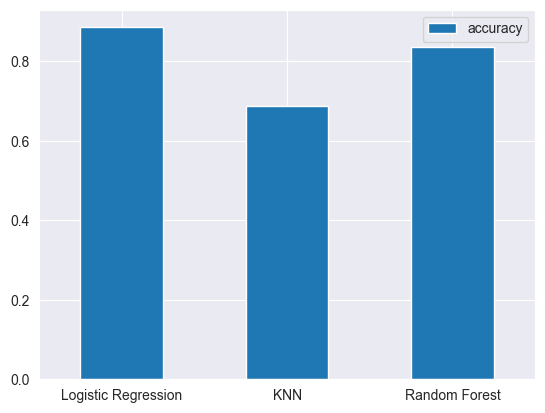

In [29]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar() # T = Transpose
plt.xticks(rotation=0);

Now we've got the baseline model, and we know a model's first predictions aren't always what we should base our next steps off.

Let's look at the following :
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(AUC)


### Hyperparameter tuning (by hand)

In [30]:
# Let's tune KNN
train_scores = []
tests_scores = []

# create a list of different values for n_neighbours
neighbours = range(1, 21)

# set up KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)

    # fit the algorithm
    knn.fit(x_train, y_train)
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    # Update the test scores list
    tests_scores.append(knn.score(x_test, y_test))

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
tests_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.41


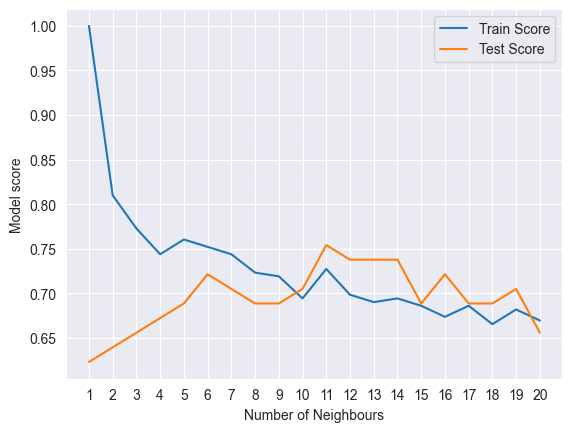

In [33]:
plt.plot(neighbours, train_scores, label="Train Score")
plt.plot(neighbours, tests_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data : {max(tests_scores)*100:.2f}")

### Hyperparameter tuning with RandomizedSearchCV

We are going to tune :
* LogisticRegression()
* RandomForestClassifier
> Using RandomizedSearchCV

In [34]:
# create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4, 4, 10),
                "solver":["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [35]:
np.arange(2, 20, 2), np.logspace(-3,3,10)

(array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
        4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
        2.15443469e+02, 1.00000000e+03]))

Now we've got hyperparameter grids set up for each of our models, Let's tune them using RandomizedSearchCV

In [36]:
# Tune the LogisticRegression

np.random.seed(42)

# Set up random hyperparameter search for LogisticRegression
rs_log_grid = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=log_reg_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)
# fit random hyperparameter search for LogisticRegression
rs_log_grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Asus\Downloads\projects\pomodoro-start\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [37]:
rs_log_grid.best_params_

{'solver': 'liblinear', 'C': np.float64(0.3593813663804626)}

In [38]:
rs_log_grid.score(x_test, y_test)

0.8852459016393442

Let's do that same for RandomForestClassifier()

In [39]:
np.random.seed(42)

# Set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
# fit random hyperparameter search for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [40]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [41]:
rs_rf.score(x_test, y_test)

0.8688524590163934

In [42]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyperparameter tuning with GridSearchCV

Since LogisticRegression model provides the best scores so far, we will try and improve them again using GridSearchCV

In [43]:
# Different hyperparameters for our LogisticRegression model

log_reg_grid = {"C":np.logspace(-4, 4, 30),
                "solver":["liblinear"]}

# Set up grid hyperparameter search for LogisticRegression
gs_log_grid = GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid,
                           cv=5,
                           verbose=True)
# fit grid hyperparameter search model
gs_log_grid.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [44]:
# check the best hyperparameters
gs_log_grid.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [45]:
# evaluate the grid search LogisticRegression
gs_log_grid.score(x_test, y_test)

0.8852459016393442

In [46]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC Score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

> And it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [47]:
# make prediction with tuned model
y_preds = gs_log_grid.predict(x_test)

In [48]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [49]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

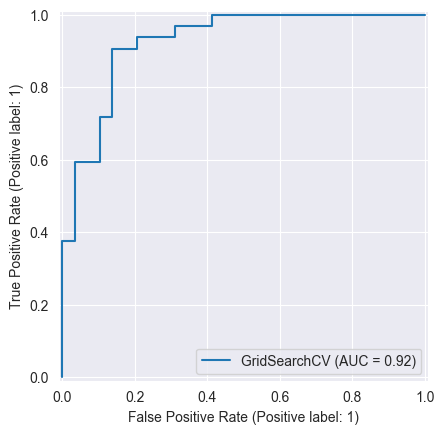

In [50]:
# plot ROC curve and calculate and calculate AUC score
RocCurveDisplay.from_estimator(estimator=gs_log_grid,
                               X=x_test, y=y_test)

In [51]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))


[[25  4]
 [ 3 29]]


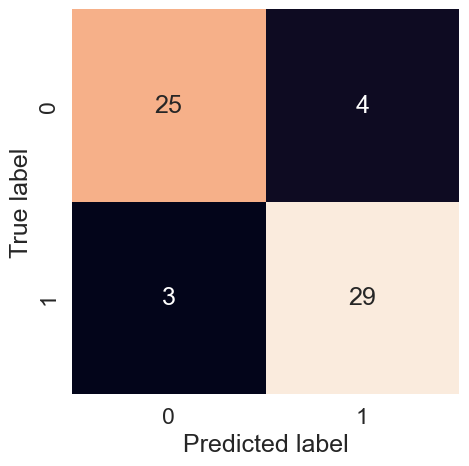

In [52]:
sns.set_theme(font_scale=1.5)

def plot_confusion_matrix(y_test, y_preds):
    """Plots a nice looking confusion matrix using Seaborn's Heatmap"""
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
plot_confusion_matrix(y_test, y_preds)

Now we have got ROC curve and AUC metric and a confusion matrix, let's get a classification report as well as cross-validation, precision, recall and F1-score.

In [53]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation matrics using cross-validation

We are going to calculate accuracy, precision, recall and F1-score of our model using cross validation and to do so we will be using `cross_val_score`

In [54]:
# check best hyperparameters
gs_log_grid.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [55]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [56]:
# cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [57]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [58]:
# cross-validated precision
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [59]:
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8215873015873015)

In [60]:
# cross-validated recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [61]:
# cross-validated F1 score
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

In [62]:
# visualise cross validated matrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                          index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.847978,0.821587,0.927273,0.87054


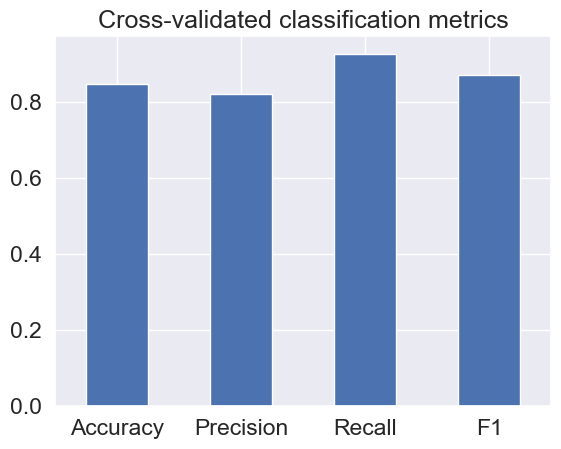

In [63]:
cv_metrics.T.plot(kind="bar", title="Cross-validated classification metrics", legend=False)
plt.xticks(rotation=0);

### Feature importance

Feature importance is another as asking, "which features contributed most to the outcome of the model and how did they contribute ?"

Finding feature importance is different for each machine learning model.
One way to find feature importance is to search for "(MODEL NAME) feature importance."

In [64]:
#For an instance of LogisticRegression
gs_log_grid.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [65]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(x_train, y_train);

In [66]:
# check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [67]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0032076873709286024),
 'sex': np.float64(-0.8606204735539111),
 'cp': np.float64(0.6600143086174385),
 'trestbps': np.float64(-0.01155970641957489),
 'chol': np.float64(-0.0016649609500147373),
 'fbs': np.float64(0.04017238940156104),
 'restecg': np.float64(0.3160340177157746),
 'thalach': np.float64(0.02458922261936637),
 'exang': np.float64(-0.6047017032281077),
 'oldpeak': np.float64(-0.567954572983317),
 'slope': np.float64(0.4508539117301764),
 'ca': np.float64(-0.6373332602422034),
 'thal': np.float64(-0.6755508982355707)}

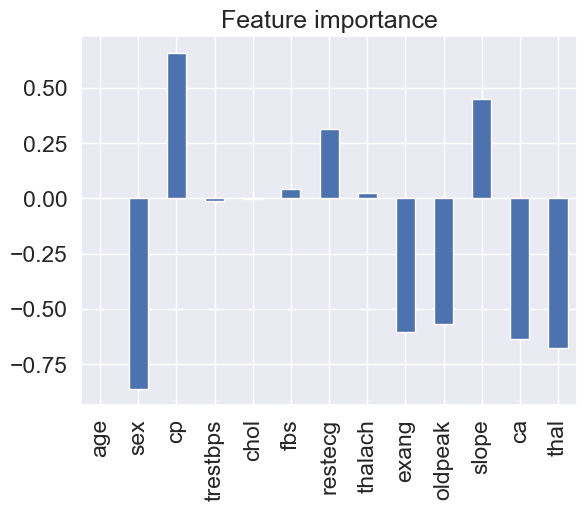

In [68]:
# visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False);

In [69]:
pd.crosstab(df.sex,df.target) # Here sex and target are negatively correlated that means as it goes on the ratio Decreases, The difference between the target 0 and 1 Decreases

target,0,1
sex,,
0,24,72
1,114,93


In [70]:
pd.crosstab(df.slope,df.target) # the correlation is positive ie, as the slope increases the ratio also increases, The difference between the target 0 and 1 also increases

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [71]:
pd.crosstab(df.exang,df.target)

target,0,1
exang,,
0,62,142
1,76,23


In [72]:
gs_log_grid.score(x_test, y_test)

0.8852459016393442

### Experimentation

* Could collect more data
* Could try a better model ? like CatBoost or XGBoost
* Could improve the current models ? (Beyond what has been done so far)

In [79]:
import joblib
joblib.dump(gs_log_grid, "heart_disease_model.joblib")

['heart_disease_model.joblib']

In [80]:
loaded_job_model = joblib.load("heart_disease_model.joblib")